In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

Считываем полученные данные - в обоих случаях генерировалось $10^8$ частиц

In [116]:
base_dir = os.getcwd()

kev250 = pd.read_csv('output_files/250_kev_output_big.txt', sep=" ", header=None)
kev250.columns = ['trackNum', 'x', 'y', 'z', 'kinEn', 'IsFirstStepInVolume', 'particleName', 'volumeName', 'dose']
kev250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509638 entries, 0 to 509637
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trackNum             509638 non-null  int64  
 1   x                    509638 non-null  float64
 2   y                    509638 non-null  float64
 3   z                    509638 non-null  float64
 4   kinEn                509638 non-null  float64
 5   IsFirstStepInVolume  509638 non-null  int64  
 6   particleName         509638 non-null  object 
 7   volumeName           509638 non-null  object 
 8   dose                 509638 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.0+ MB


In [117]:
kev300 = pd.read_csv('output_files/300kev_output_big.txt', sep=" ", header=None)
kev300.columns = ['trackNum', 'x', 'y', 'z', 'kinEn', 'IsFirstStepInVolume', 'particleName', 'volumeName', 'dose']
kev300.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043073 entries, 0 to 1043072
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   trackNum             1043073 non-null  int64  
 1   x                    1043073 non-null  float64
 2   y                    1043073 non-null  float64
 3   z                    1043073 non-null  float64
 4   kinEn                1043073 non-null  float64
 5   IsFirstStepInVolume  1043073 non-null  int64  
 6   particleName         1043073 non-null  object 
 7   volumeName           1043073 non-null  object 
 8   dose                 1043073 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 71.6+ MB


 Переносим систему отсчёта в центр мишени, оставляем только Гамма-кванты которые сделали первый шаг в объёме детектора

In [118]:
kev250['z'] = kev250['z'] - 80
kev250 = kev250[(kev250['IsFirstStepInVolume'] == 1) & (kev250['particleName'] == 'gamma')]
kev250.count()

trackNum               490713
x                      490713
y                      490713
z                      490713
kinEn                  490713
IsFirstStepInVolume    490713
particleName           490713
volumeName             490713
dose                   490713
dtype: int64

In [119]:
kev300['z'] = kev300['z'] - 80
kev300 = kev300[(kev300['IsFirstStepInVolume'] == 1) & (kev300['particleName'] == 'gamma')]
kev300.count()

trackNum               1004180
x                      1004180
y                      1004180
z                      1004180
kinEn                  1004180
IsFirstStepInVolume    1004180
particleName           1004180
volumeName             1004180
dose                   1004180
dtype: int64

# Разделение таблиц по мишеням

In [120]:
kev250_0 = kev250[kev250.volumeName == 'ScoringVolume']
kev250_1 = kev250[kev250.volumeName == 'ScoringPan07']
kev250_2 = kev250[kev250.volumeName == 'ScoringPan10']

kev300_0 = kev300[kev300.volumeName == 'ScoringVolume']
kev300_1 = kev300[kev300.volumeName == 'ScoringPan07']
kev300_2 = kev300[kev300.volumeName == 'ScoringPan10']

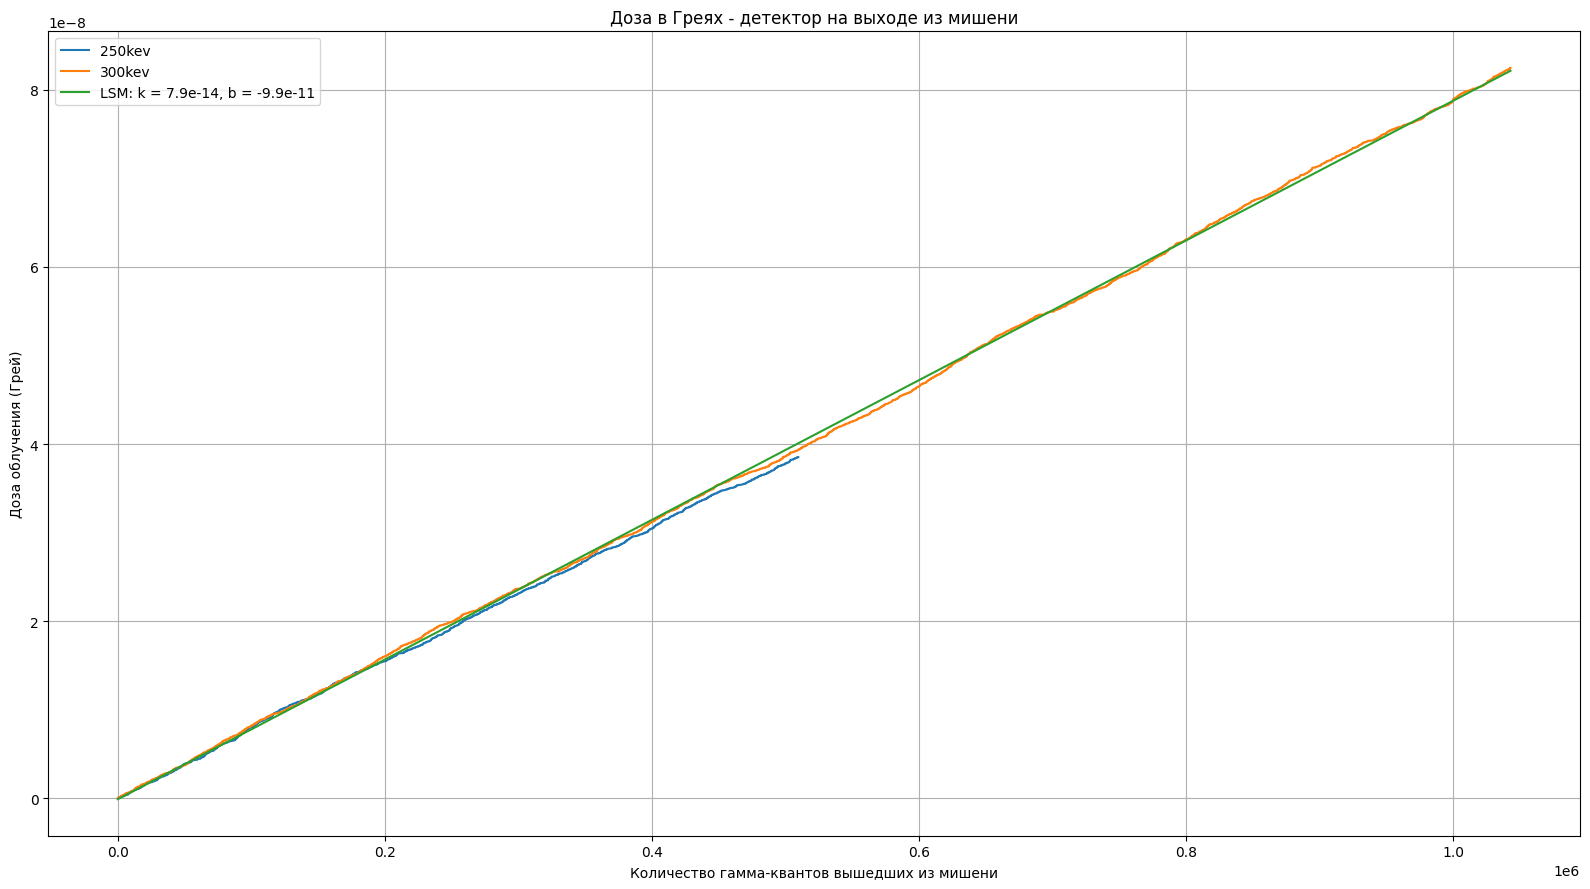

In [129]:
lsm = np.polyfit(x=kev300_0.dose.index, y=kev300_0.dose.values, deg=1)

plt.figure(figsize=(16, 9))
sns.lineplot(kev250_0.dose, label = '250kev')
sns.lineplot(kev300_0.dose, label = '300kev')
sns.lineplot(x=kev300_0.dose.index, y = (lsm[0] * kev300_0.dose.index + lsm[1]), label = f'LSM: k = {lsm[0]:.1e}, b = {lsm[1]:.1e}')
plt.title('Доза в Греях - детектор на выходе из мишени')
plt.xlabel('Количество гамма-квантов вышедших из мишени')
plt.tight_layout()
plt.ylabel('Доза облучения (Грей)')
plt.grid()
plt.show()

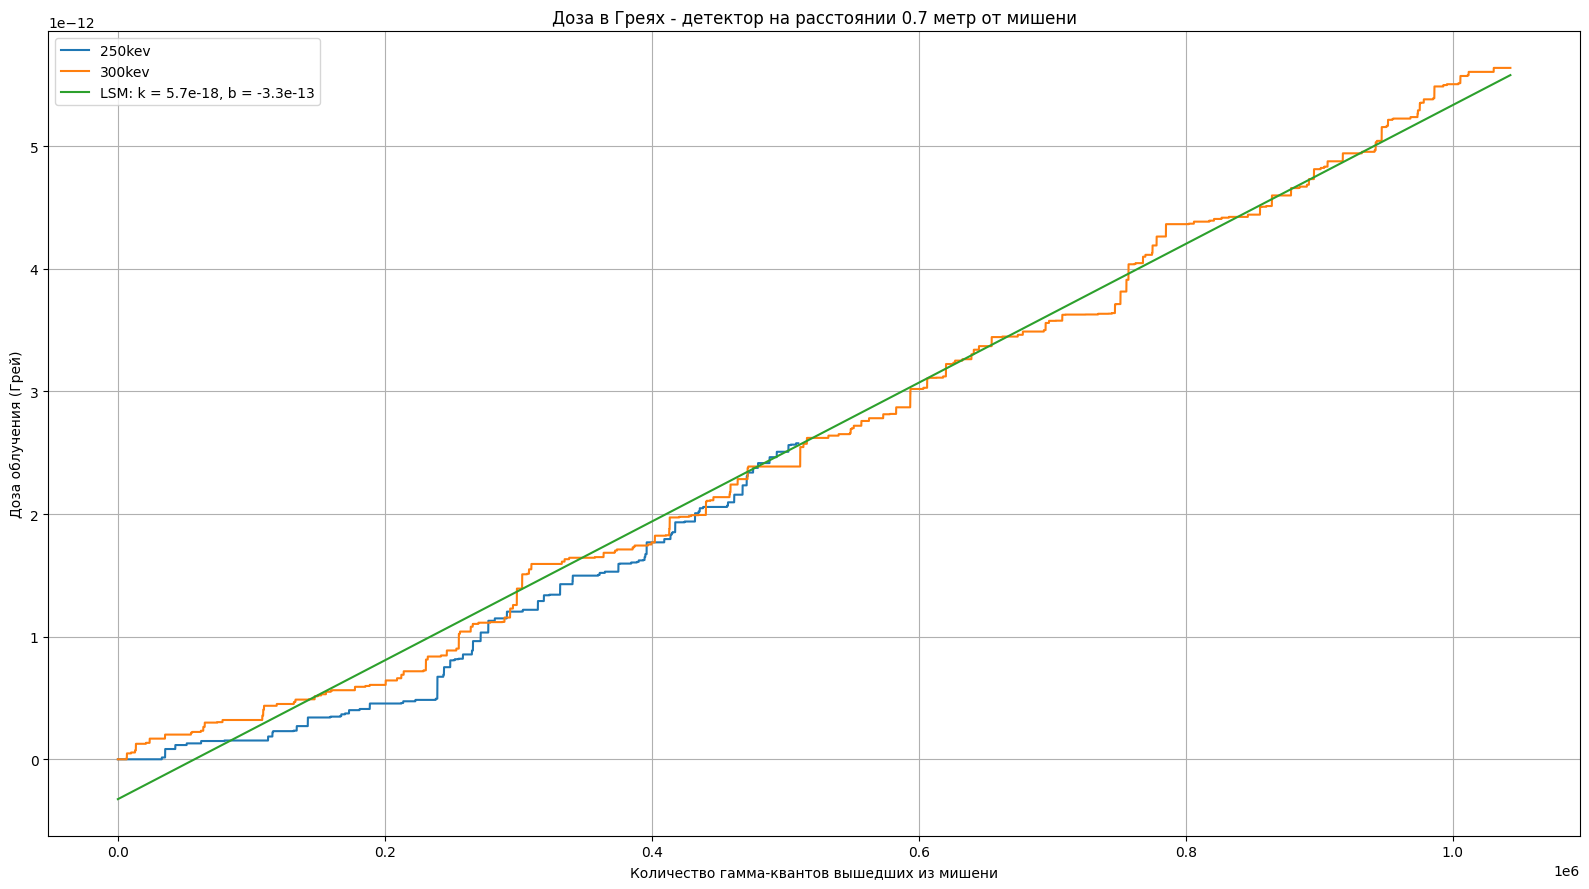

In [122]:
lsm = np.polyfit(x=kev300_1.dose.index, y=kev300_1.dose.values, deg=1)

plt.figure(figsize=(16, 9))
sns.lineplot(kev250_1.dose, label = '250kev')
sns.lineplot(kev300_1.dose, label = '300kev')
sns.lineplot(x=kev300_1.dose.index, y = (lsm[0] * kev300_1.dose.index + lsm[1]), label = f'LSM: k = {lsm[0]:.1e}, b = {lsm[1]:.1e}')
plt.title('Доза в Греях - детектор на расстоянии 0.7 метр от мишени')
plt.xlabel('Количество гамма-квантов вышедших из мишени')
plt.ylabel('Доза облучения (Грей)')
plt.tight_layout()
plt.grid()
plt.show()

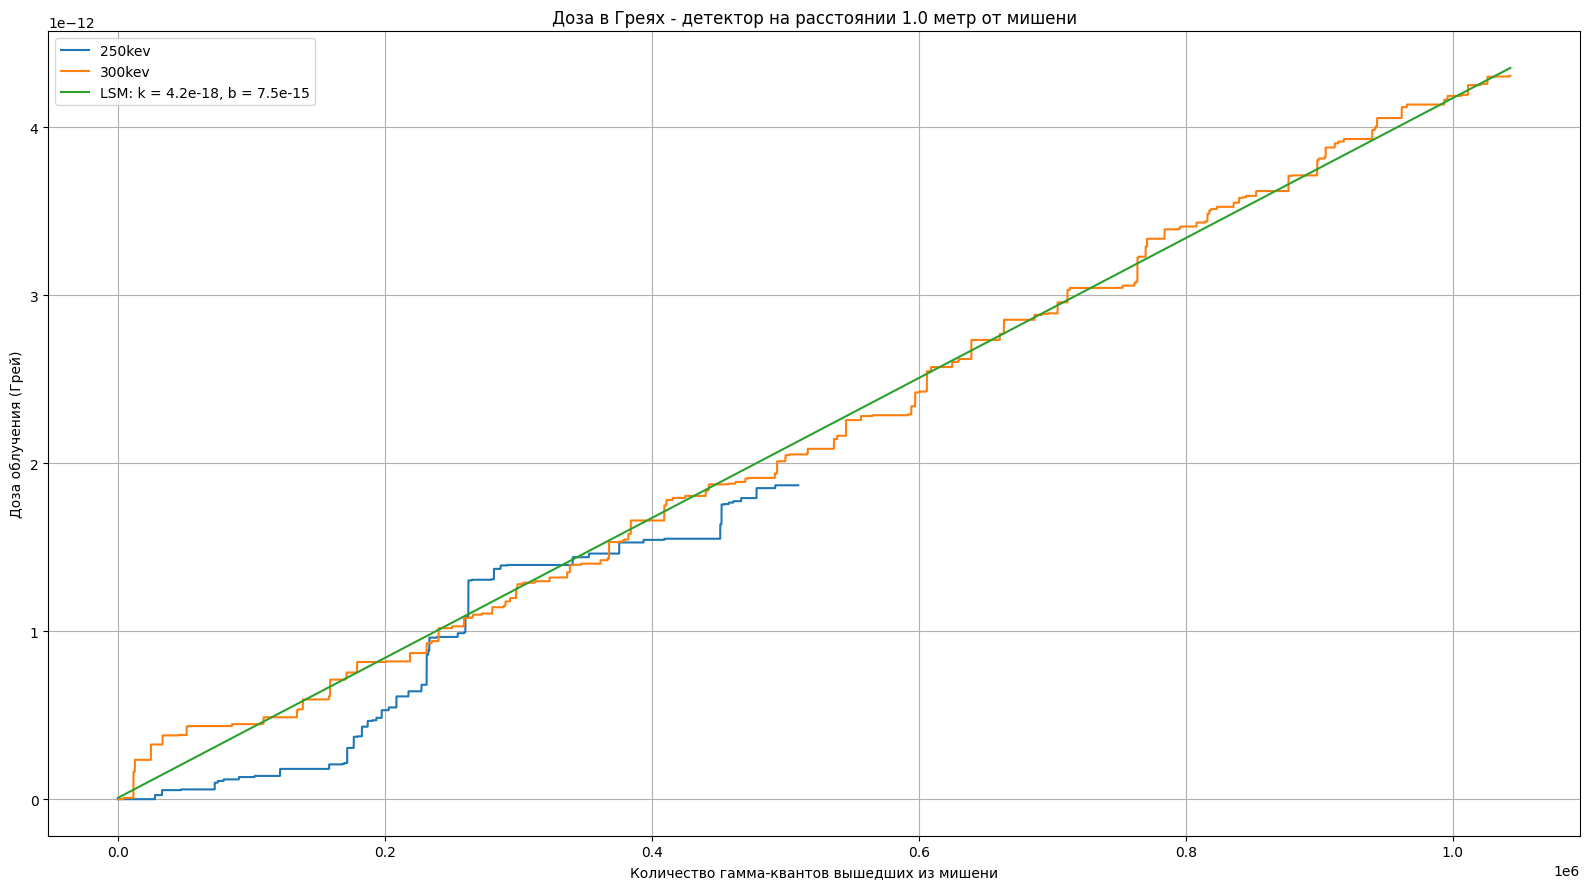

In [123]:
lsm = np.polyfit(x=kev300_2.dose.index, y=kev300_2.dose.values, deg=1)


plt.figure(figsize=(16, 9))
sns.lineplot(kev250_2.dose, label = '250kev')
sns.lineplot(kev300_2.dose, label = '300kev')
sns.lineplot(x=kev300_2.dose.index, 
            y = (lsm[0] * kev300_2.dose.index + lsm[1]), 
            label = f'LSM: k = {lsm[0]:.1e}, b = {lsm[1]:.1e}')

plt.title('Доза в Греях - детектор на расстоянии 1.0 метр от мишени')
plt.xlabel('Количество гамма-квантов вышедших из мишени')
plt.ylabel('Доза облучения (Грей)')
plt.tight_layout()
plt.grid()
plt.show()

## Поверность координат детектирования частиц

Генерируется цилиндрический слой частиц с заданной энергией падающий на мишень по нормали

250 кЭв

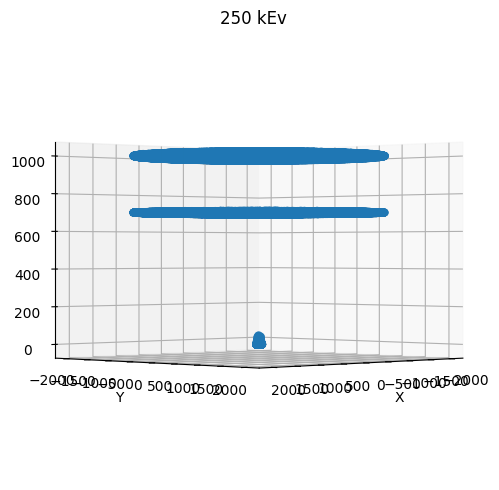

In [125]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(kev250['x'], kev250['y'], kev250['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("250 kEv")
ax.view_init(elev=0, azim=45, roll=0)
plt.tight_layout()
plt.show()

300 кЭв

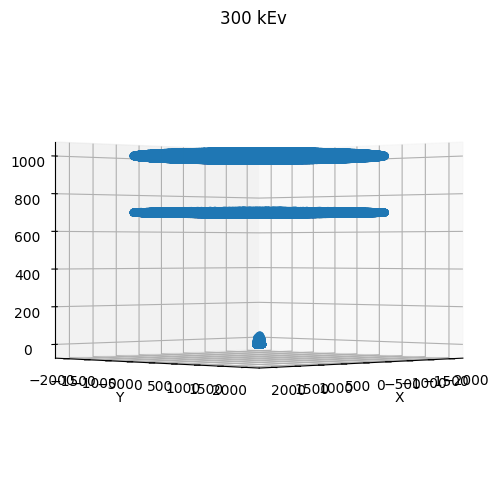

In [126]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(kev300['x'], kev300['y'], kev300['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("300 kEv")
ax.view_init(elev=0, azim=45, roll=0)
plt.tight_layout()
plt.show()

## Определение вида пятна генерируемого излучения

### Энергия частиц 300 кЭв

Детектор на расстоянии 1м

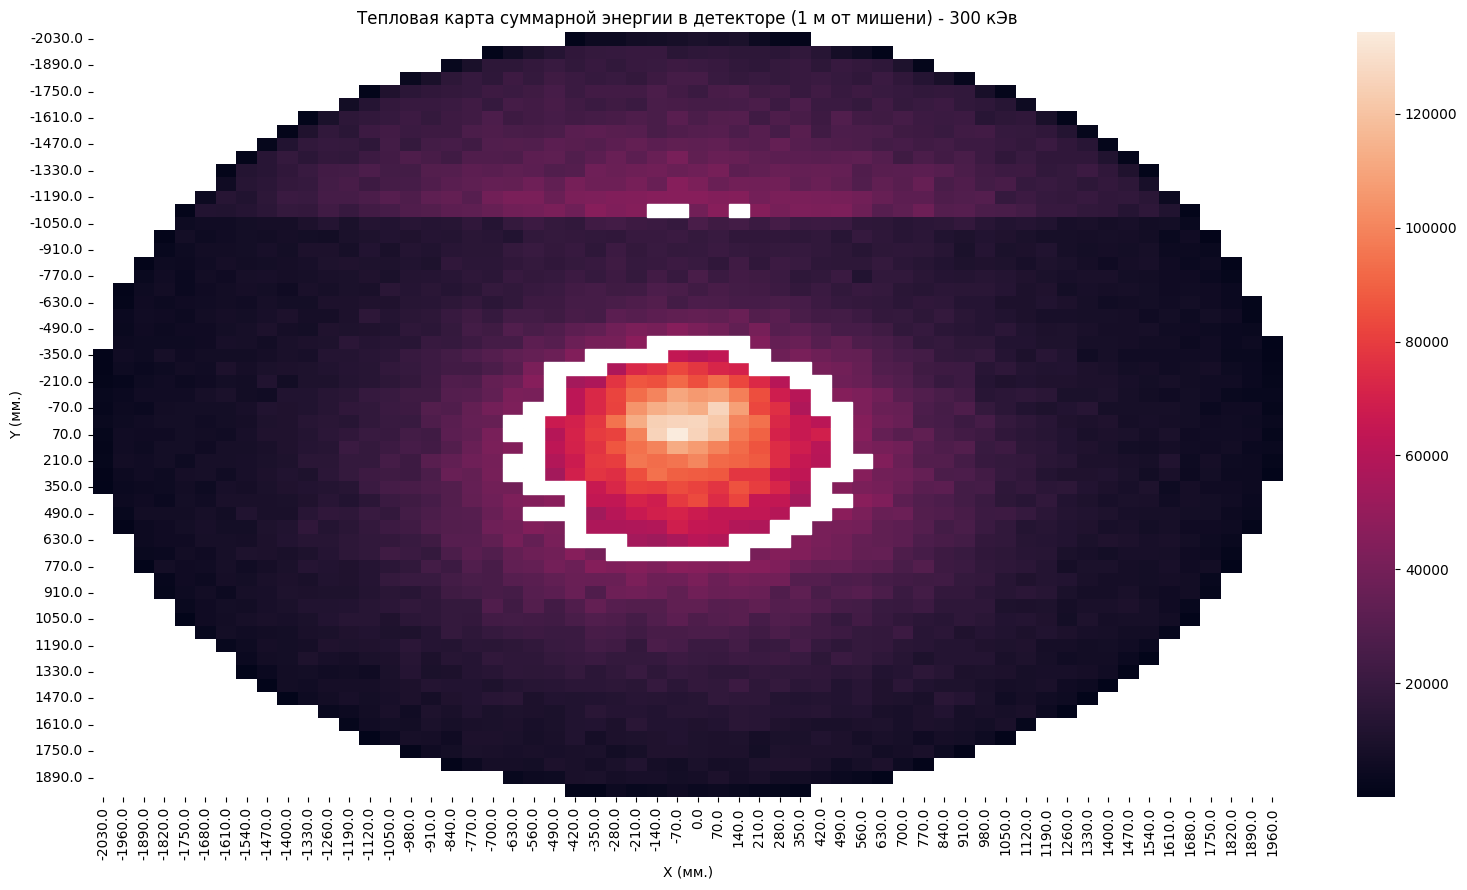

In [34]:
granularity = 70
kev300_2['x_trunc'] = (kev300_2['x'] // granularity).round() * granularity
kev300_2['y_trunc'] = (kev300_2['y'] // granularity).round() * granularity
heatmap_data = kev300_2.pivot_table(index='y_trunc', columns='x_trunc', values='kinEn', aggfunc='sum')

# Find top 4 values in the entire heatmap data
flat_values = heatmap_data.values.flatten()
flat_values = flat_values[~np.isnan(flat_values)]
top4_values = np.sort(flat_values)[-4:]
top4_mean = np.mean(top4_values)

# Calculate threshold value (e times less than top4_mean)
threshold = top4_mean / np.e

# Create a binary mask for values above threshold
above_threshold = heatmap_data >= threshold

# Create the plot
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта суммарной энергии в детекторе (1 м от мишени) - 300 кЭв')
ax = sns.heatmap(heatmap_data)
plt.ylabel('Y (мм.)')
plt.xlabel('X (мм.)')

# Find the boundary pixels
boundary_pixels = []
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if above_threshold.iloc[i, j]:
            # Check neighbors (in 8 directions)
            is_boundary = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if (0 <= ni < len(above_threshold.index) and 
                        0 <= nj < len(above_threshold.columns) and 
                        not above_threshold.iloc[ni, nj]):
                        is_boundary = True
                        break
                if is_boundary:
                    break
            
            if is_boundary:
                boundary_pixels.append((j, i))  # j,i for x,y coordinates in plot

# Add white rectangles for the boundary pixels
for j, i in boundary_pixels:
    rect = Rectangle((j, i), 1, 1, facecolor='white', edgecolor='white')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

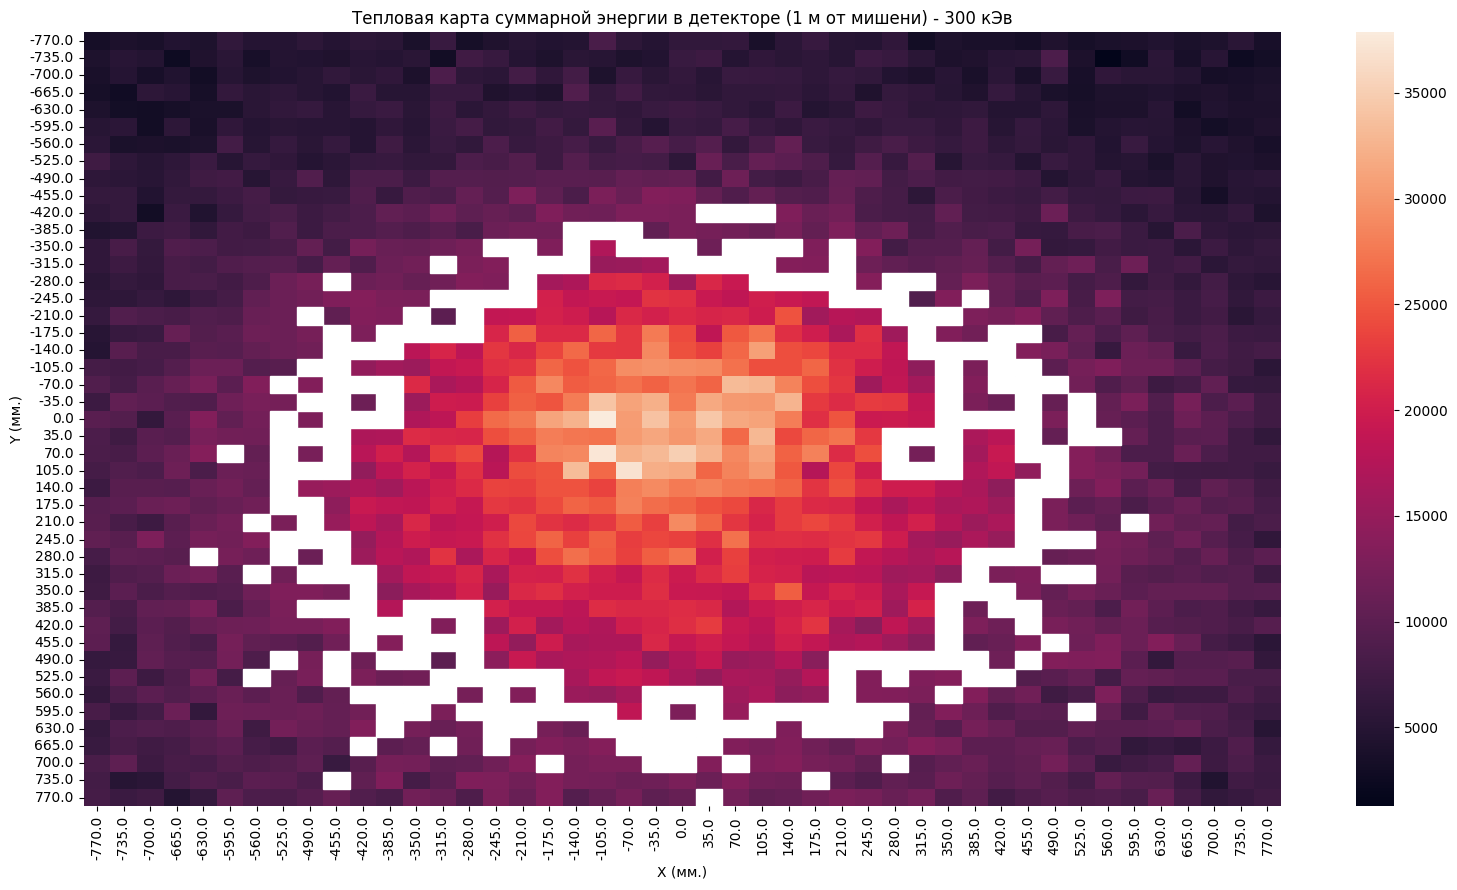

In [35]:
granularity = 35
kev300_2['x_trunc'] = (kev300_2['x'] // granularity).round() * granularity
kev300_2['y_trunc'] = (kev300_2['y'] // granularity).round() * granularity
query = (np.abs(kev300_2['x_trunc']) < 800) & (np.abs(kev300_2['y_trunc']) < 800)
heatmap_data = kev300_2[query].pivot_table(index='y_trunc', columns='x_trunc', values='kinEn', aggfunc='sum')

# Find top 4 values in the entire heatmap data
flat_values = heatmap_data.values.flatten()
flat_values = flat_values[~np.isnan(flat_values)]
top4_values = np.sort(flat_values)[-4:]
top4_mean = np.mean(top4_values)

# Calculate threshold value (e times less than top4_mean)
threshold = top4_mean / np.e

# Create a binary mask for values above threshold
above_threshold = heatmap_data >= threshold

# Create the plot
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта суммарной энергии в детекторе (1 м от мишени) - 300 кЭв')
ax = sns.heatmap(heatmap_data)
plt.ylabel('Y (мм.)')
plt.xlabel('X (мм.)')

# Find the boundary pixels
boundary_pixels = []
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if above_threshold.iloc[i, j]:
            # Check neighbors (in 8 directions)
            is_boundary = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if (0 <= ni < len(above_threshold.index) and 
                        0 <= nj < len(above_threshold.columns) and 
                        not above_threshold.iloc[ni, nj]):
                        is_boundary = True
                        break
                if is_boundary:
                    break
            
            if is_boundary:
                boundary_pixels.append((j, i))  # j,i for x,y coordinates in plot

# Add white rectangles for the boundary pixels
for j, i in boundary_pixels:
    rect = Rectangle((j, i), 1, 1, facecolor='white', edgecolor='white')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

Детектор на расстоянии 0.7м

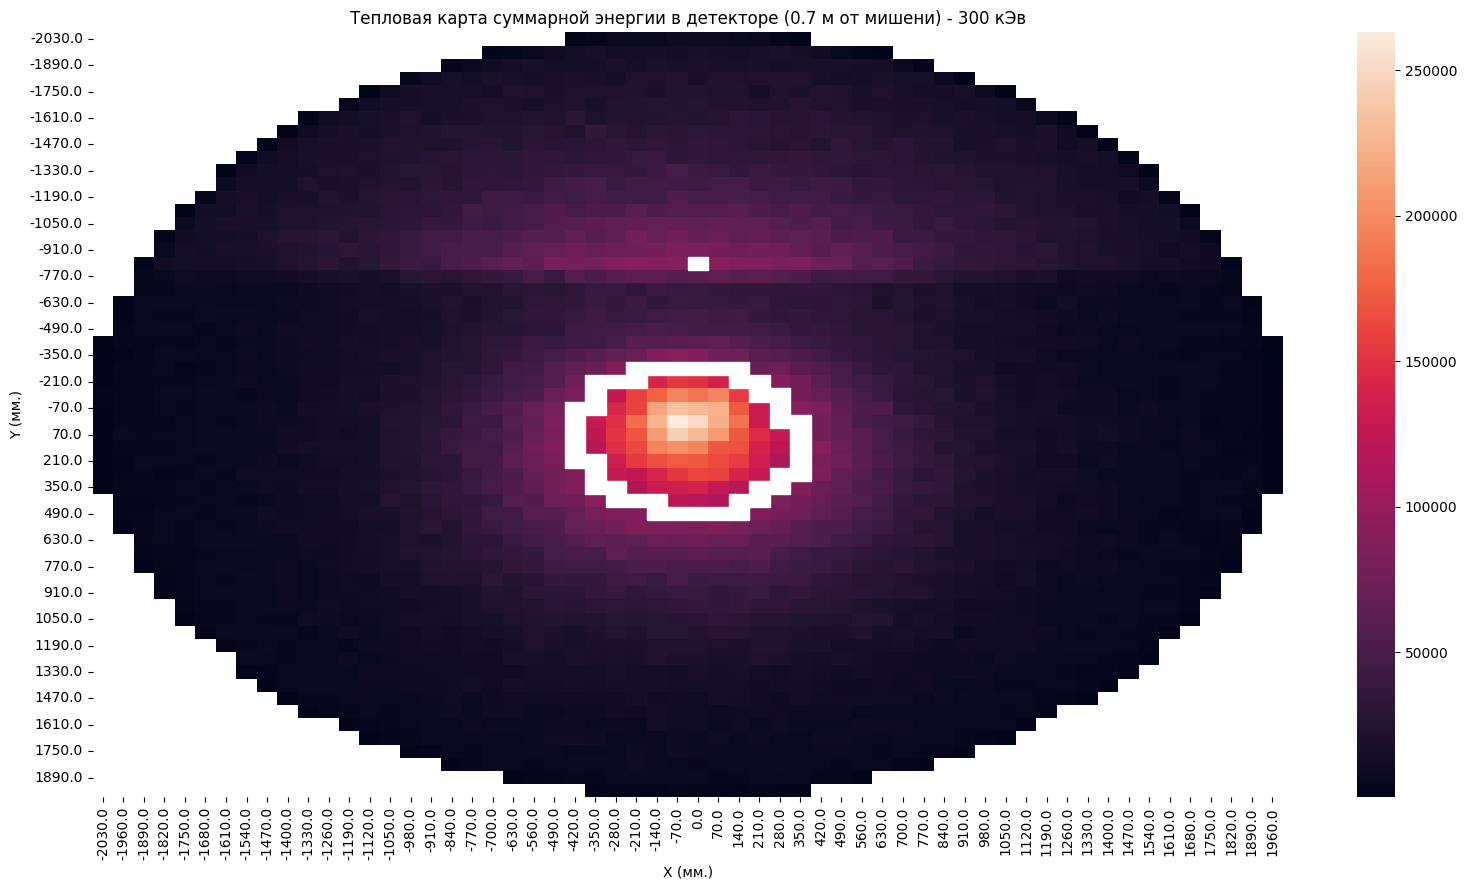

In [36]:
granularity = 70
kev300_1['x_trunc'] = (kev300_1['x'] // granularity).round() * granularity
kev300_1['y_trunc'] = (kev300_1['y'] // granularity).round() * granularity
heatmap_data = kev300_1.pivot_table(index='y_trunc', columns='x_trunc', values='kinEn', aggfunc='sum')

# Find top 4 values in the entire heatmap data
flat_values = heatmap_data.values.flatten()
flat_values = flat_values[~np.isnan(flat_values)]
top4_values = np.sort(flat_values)[-4:]
top4_mean = np.mean(top4_values)

# Calculate threshold value (e times less than top4_mean)
threshold = top4_mean / np.e

# Create a binary mask for values above threshold
above_threshold = heatmap_data >= threshold

# Create the plot
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта суммарной энергии в детекторе (0.7 м от мишени) - 300 кЭв')
ax = sns.heatmap(heatmap_data)
plt.ylabel('Y (мм.)')
plt.xlabel('X (мм.)')

# Find the boundary pixels
boundary_pixels = []
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if above_threshold.iloc[i, j]:
            # Check neighbors (in 8 directions)
            is_boundary = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if (0 <= ni < len(above_threshold.index) and 
                        0 <= nj < len(above_threshold.columns) and 
                        not above_threshold.iloc[ni, nj]):
                        is_boundary = True
                        break
                if is_boundary:
                    break
            
            if is_boundary:
                boundary_pixels.append((j, i))  # j,i for x,y coordinates in plot

# Add white rectangles for the boundary pixels
for j, i in boundary_pixels:
    rect = Rectangle((j, i), 1, 1, facecolor='white', edgecolor='white')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

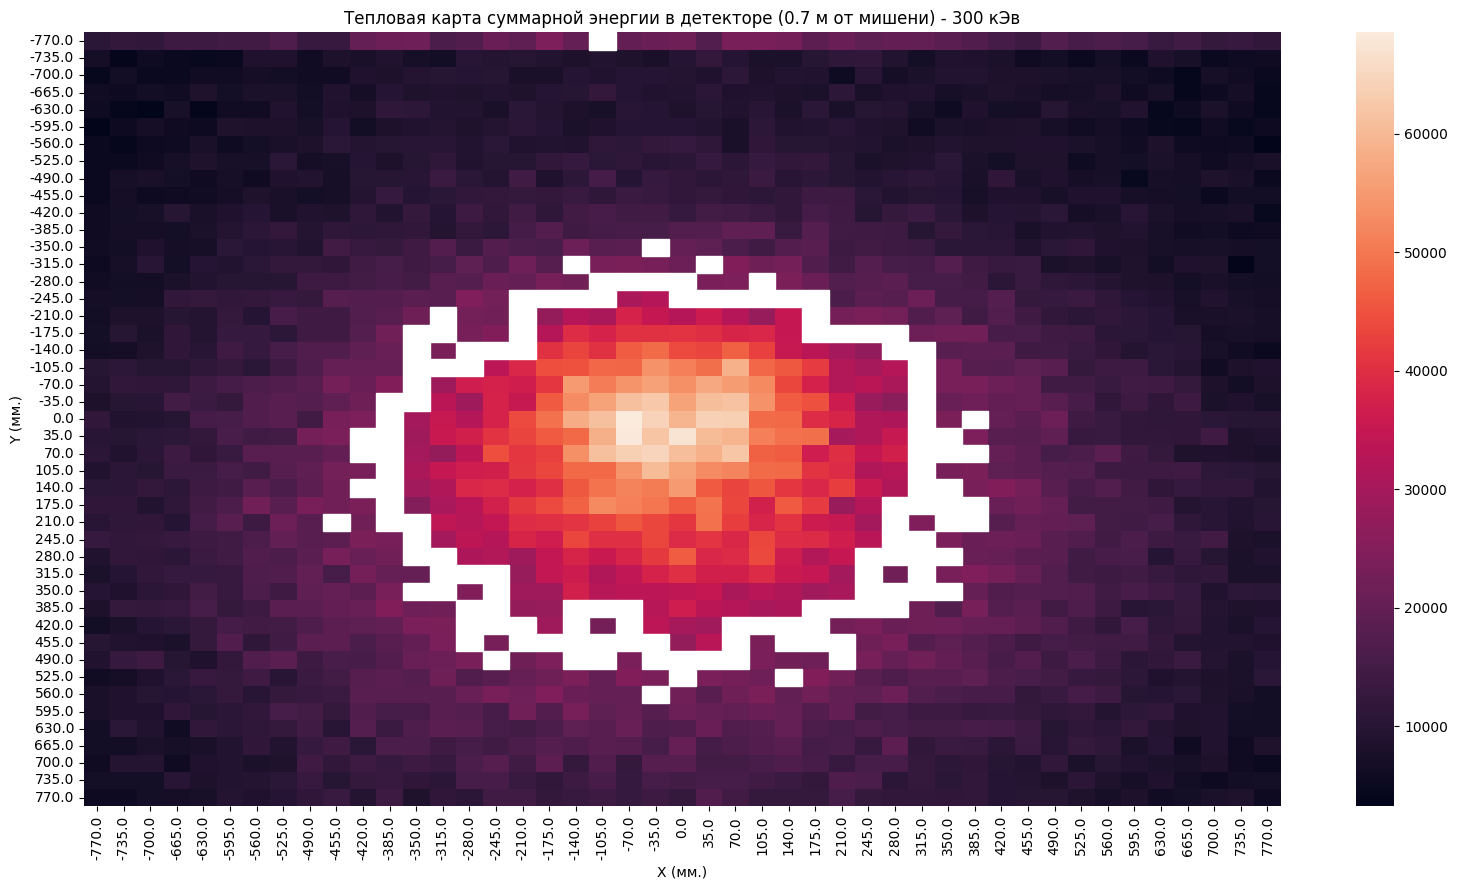

In [37]:
granularity = 35
kev300_1['x_trunc'] = (kev300_1['x'] // granularity).round() * granularity
kev300_1['y_trunc'] = (kev300_1['y'] // granularity).round() * granularity
query = (np.abs(kev300_1['x_trunc']) < 800) & (np.abs(kev300_1['y_trunc']) < 800)
heatmap_data = kev300_1[query].pivot_table(index='y_trunc', columns='x_trunc', values='kinEn', aggfunc='sum')

# Find top 4 values in the entire heatmap data
flat_values = heatmap_data.values.flatten()
flat_values = flat_values[~np.isnan(flat_values)]
top4_values = np.sort(flat_values)[-4:]
top4_mean = np.mean(top4_values)

# Calculate threshold value (e times less than top4_mean)
threshold = top4_mean / np.e

# Create a binary mask for values above threshold
above_threshold = heatmap_data >= threshold

# Create the plot
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта суммарной энергии в детекторе (0.7 м от мишени) - 300 кЭв')
ax = sns.heatmap(heatmap_data)
plt.ylabel('Y (мм.)')
plt.xlabel('X (мм.)')

# Find the boundary pixels
boundary_pixels = []
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if above_threshold.iloc[i, j]:
            # Check neighbors (in 8 directions)
            is_boundary = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if (0 <= ni < len(above_threshold.index) and 
                        0 <= nj < len(above_threshold.columns) and 
                        not above_threshold.iloc[ni, nj]):
                        is_boundary = True
                        break
                if is_boundary:
                    break
            
            if is_boundary:
                boundary_pixels.append((j, i))  # j,i for x,y coordinates in plot

# Add white rectangles for the boundary pixels
for j, i in boundary_pixels:
    rect = Rectangle((j, i), 1, 1, facecolor='white', edgecolor='white')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

## 250 кЭв

Детектор на расстоянии 1м

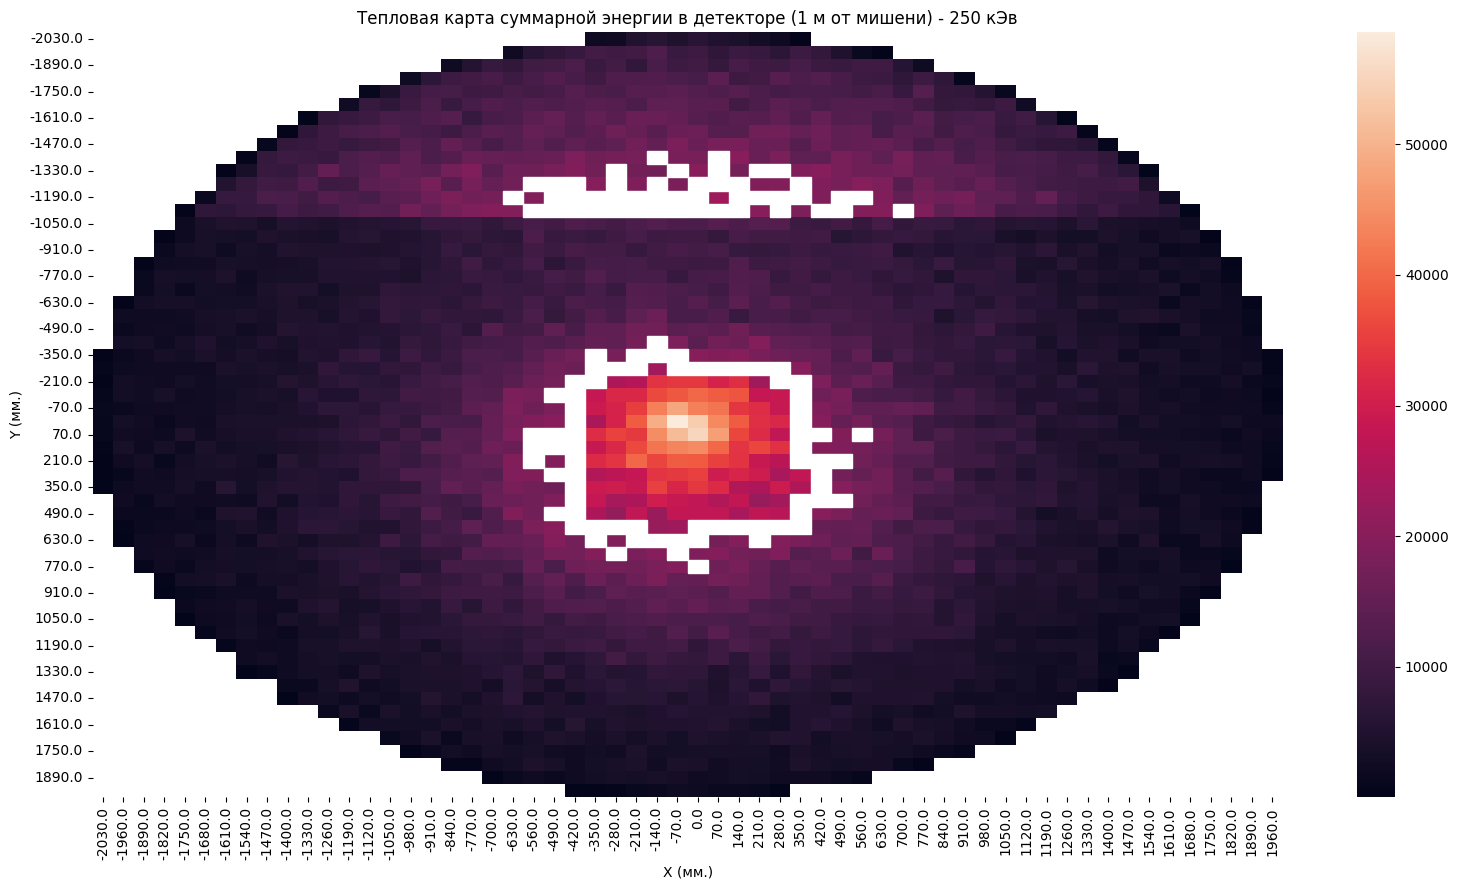

In [38]:
granularity = 70
kev250_2['x_trunc'] = (kev250_2['x'] // granularity).round() * granularity
kev250_2['y_trunc'] = (kev250_2['y'] // granularity).round() * granularity
heatmap_data = kev250_2.pivot_table(index='y_trunc', columns='x_trunc', values='kinEn', aggfunc='sum')

# Find top 4 values in the entire heatmap data
flat_values = heatmap_data.values.flatten()
flat_values = flat_values[~np.isnan(flat_values)]
top4_values = np.sort(flat_values)[-4:]
top4_mean = np.mean(top4_values)

# Calculate threshold value (e times less than top4_mean)
threshold = top4_mean / np.e

# Create a binary mask for values above threshold
above_threshold = heatmap_data >= threshold

# Create the plot
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта суммарной энергии в детекторе (1 м от мишени) - 250 кЭв')
ax = sns.heatmap(heatmap_data)
plt.ylabel('Y (мм.)')
plt.xlabel('X (мм.)')

# Find the boundary pixels
boundary_pixels = []
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if above_threshold.iloc[i, j]:
            # Check neighbors (in 8 directions)
            is_boundary = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if (0 <= ni < len(above_threshold.index) and 
                        0 <= nj < len(above_threshold.columns) and 
                        not above_threshold.iloc[ni, nj]):
                        is_boundary = True
                        break
                if is_boundary:
                    break
            
            if is_boundary:
                boundary_pixels.append((j, i))  # j,i for x,y coordinates in plot

# Add white rectangles for the boundary pixels
for j, i in boundary_pixels:
    rect = Rectangle((j, i), 1, 1, facecolor='white', edgecolor='white')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

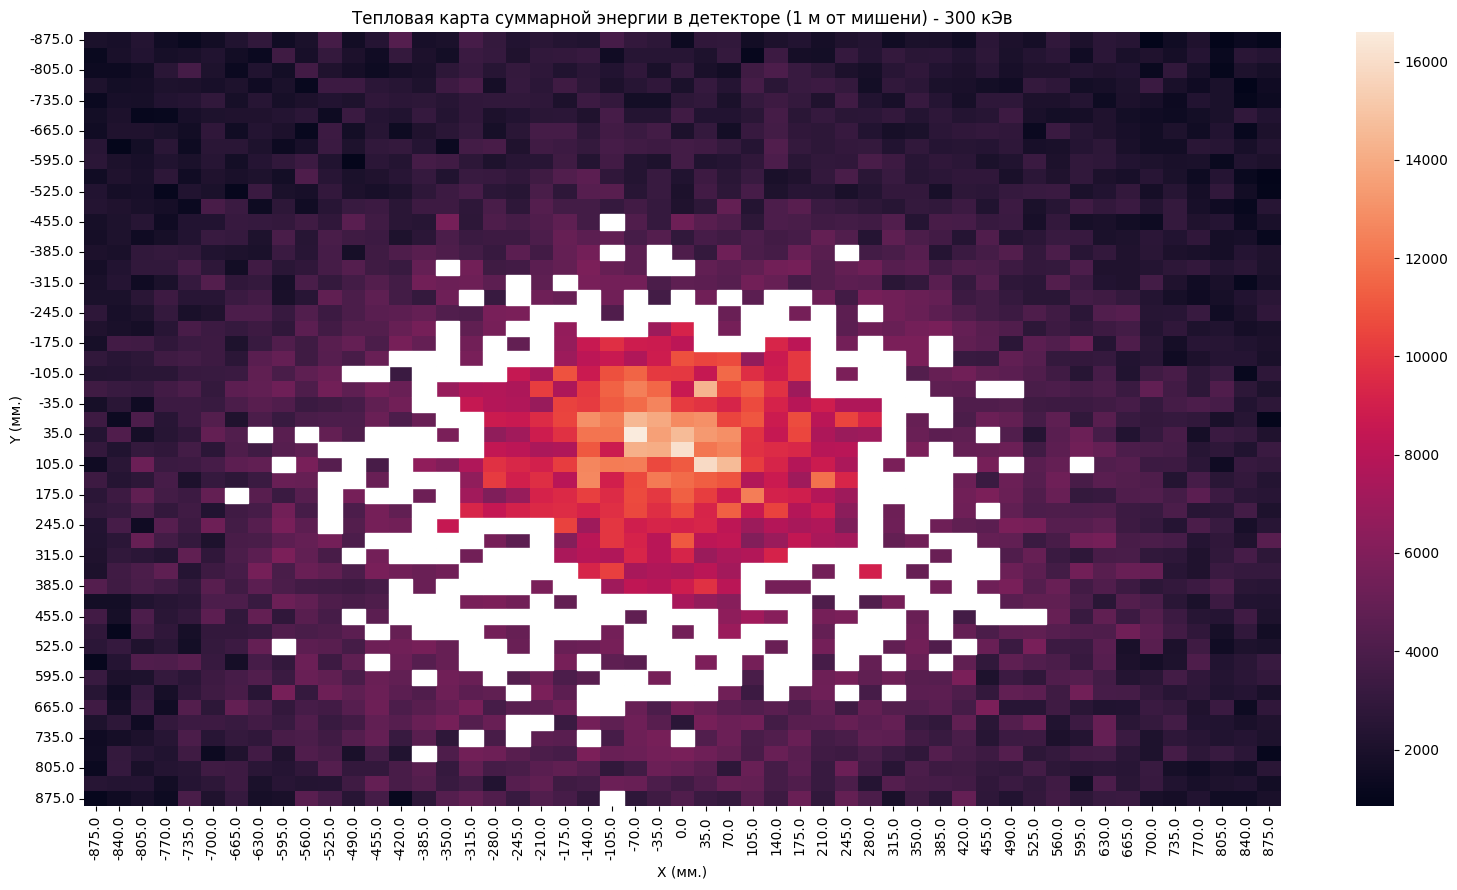

In [39]:
granularity = 35
kev250_2['x_trunc'] = (kev250_2['x'] // granularity).round() * granularity
kev250_2['y_trunc'] = (kev250_2['y'] // granularity).round() * granularity
query = (np.abs(kev250_2['x_trunc']) < 900) & (np.abs(kev250_2['y_trunc']) < 900)
heatmap_data = kev250_2[query].pivot_table(index='y_trunc', columns='x_trunc', values='kinEn', aggfunc='sum')

# Find top 4 values in the entire heatmap data
flat_values = heatmap_data.values.flatten()
flat_values = flat_values[~np.isnan(flat_values)]
top4_values = np.sort(flat_values)[-4:]
top4_mean = np.mean(top4_values)

# Calculate threshold value (e times less than top4_mean)
threshold = top4_mean / np.e

# Create a binary mask for values above threshold
above_threshold = heatmap_data >= threshold

# Create the plot
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта суммарной энергии в детекторе (1 м от мишени) - 300 кЭв')
ax = sns.heatmap(heatmap_data)
plt.ylabel('Y (мм.)')
plt.xlabel('X (мм.)')

# Find the boundary pixels
boundary_pixels = []
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if above_threshold.iloc[i, j]:
            # Check neighbors (in 8 directions)
            is_boundary = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if (0 <= ni < len(above_threshold.index) and 
                        0 <= nj < len(above_threshold.columns) and 
                        not above_threshold.iloc[ni, nj]):
                        is_boundary = True
                        break
                if is_boundary:
                    break
            
            if is_boundary:
                boundary_pixels.append((j, i))  # j,i for x,y coordinates in plot

# Add white rectangles for the boundary pixels
for j, i in boundary_pixels:
    rect = Rectangle((j, i), 1, 1, facecolor='white', edgecolor='white')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

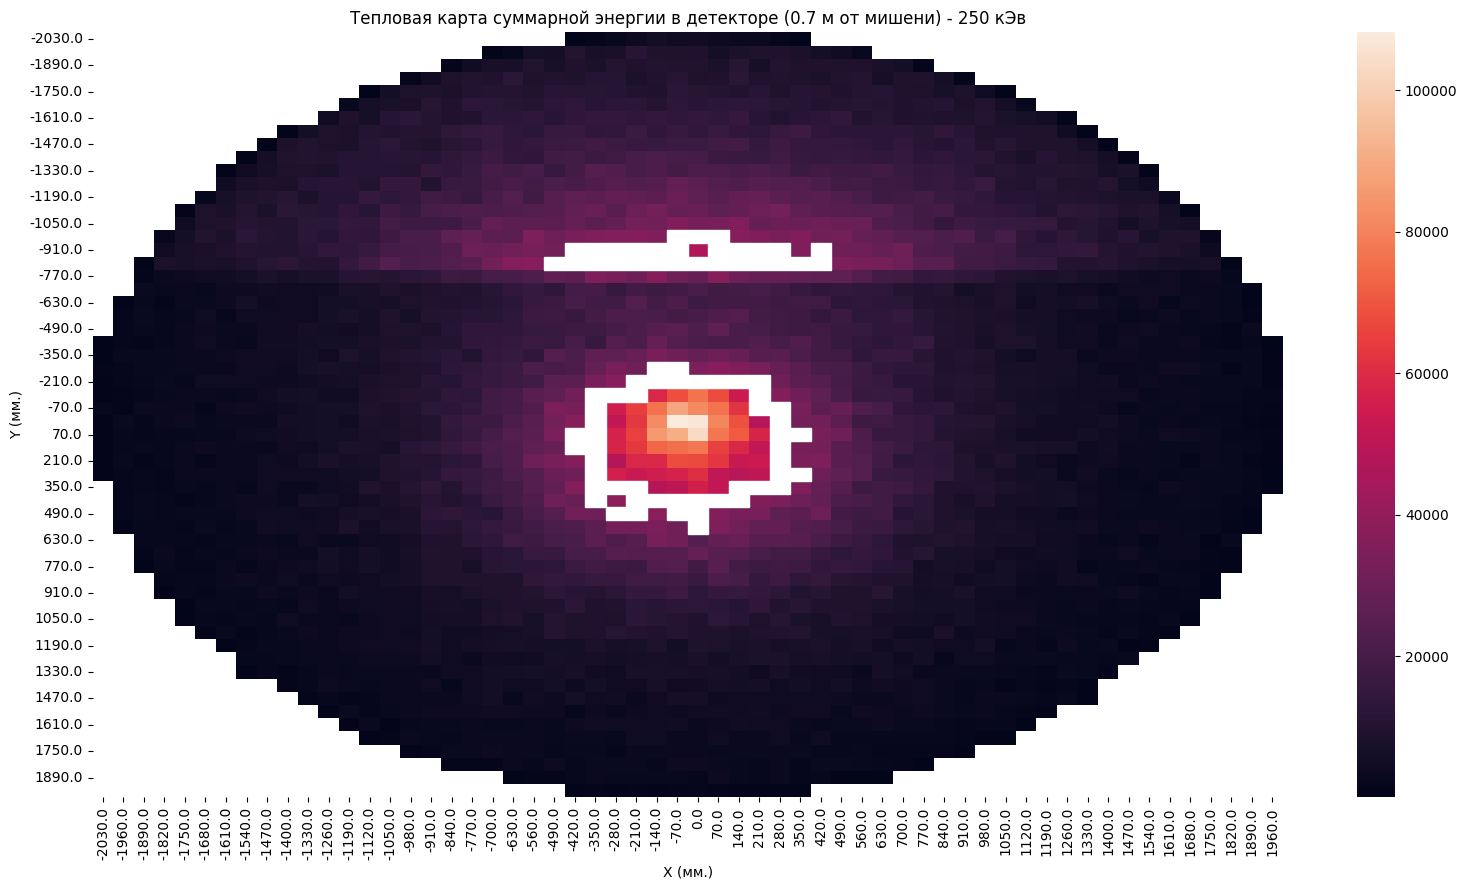

In [40]:
granularity = 70
kev250_1['x_trunc'] = (kev250_1['x'] // granularity).round() * granularity
kev250_1['y_trunc'] = (kev250_1['y'] // granularity).round() * granularity
heatmap_data = kev250_1.pivot_table(index='y_trunc', columns='x_trunc', values='kinEn', aggfunc='sum')

# Find top 4 values in the entire heatmap data
flat_values = heatmap_data.values.flatten()
flat_values = flat_values[~np.isnan(flat_values)]
top4_values = np.sort(flat_values)[-4:]
top4_mean = np.mean(top4_values)

# Calculate threshold value (e times less than top4_mean)
threshold = top4_mean / np.e

# Create a binary mask for values above threshold
above_threshold = heatmap_data >= threshold

# Create the plot
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта суммарной энергии в детекторе (0.7 м от мишени) - 250 кЭв')
ax = sns.heatmap(heatmap_data)
plt.ylabel('Y (мм.)')
plt.xlabel('X (мм.)')

# Find the boundary pixels
boundary_pixels = []
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if above_threshold.iloc[i, j]:
            # Check neighbors (in 8 directions)
            is_boundary = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if (0 <= ni < len(above_threshold.index) and 
                        0 <= nj < len(above_threshold.columns) and 
                        not above_threshold.iloc[ni, nj]):
                        is_boundary = True
                        break
                if is_boundary:
                    break
            
            if is_boundary:
                boundary_pixels.append((j, i))  # j,i for x,y coordinates in plot

# Add white rectangles for the boundary pixels
for j, i in boundary_pixels:
    rect = Rectangle((j, i), 1, 1, facecolor='white', edgecolor='white')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

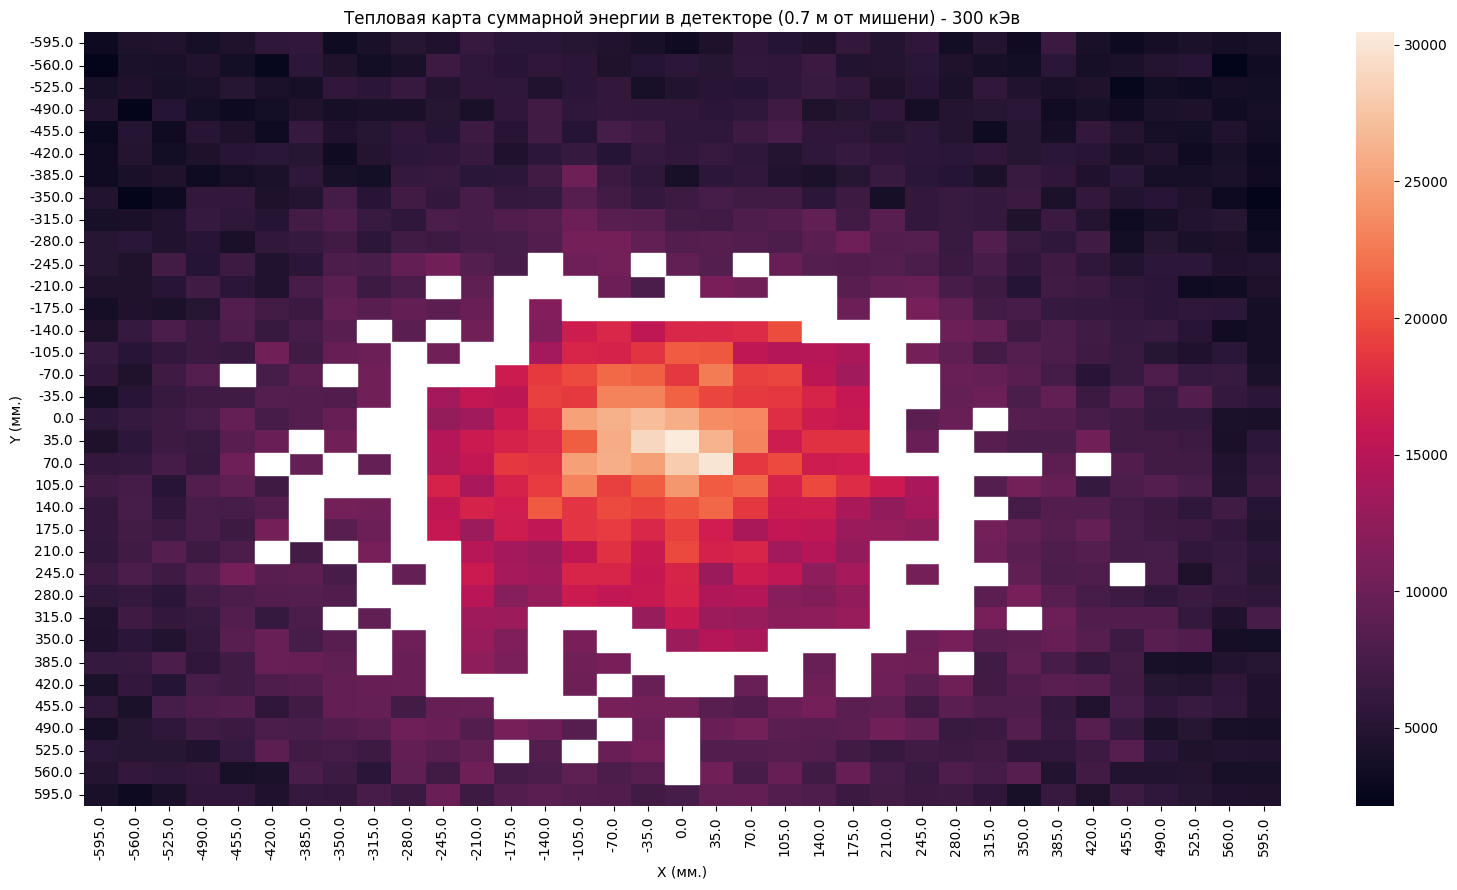

In [43]:
granularity = 35
kev250_1['x_trunc'] = (kev250_1['x'] // granularity).round() * granularity
kev250_1['y_trunc'] = (kev250_1['y'] // granularity).round() * granularity
query = (np.abs(kev250_1['x_trunc']) < 600) & (np.abs(kev250_1['y_trunc']) < 600)
heatmap_data = kev250_1[query].pivot_table(index='y_trunc', columns='x_trunc', values='kinEn', aggfunc='sum')

# Find top 4 values in the entire heatmap data
flat_values = heatmap_data.values.flatten()
flat_values = flat_values[~np.isnan(flat_values)]
top4_values = np.sort(flat_values)[-4:]
top4_mean = np.mean(top4_values)

# Calculate threshold value (e times less than top4_mean)
threshold = top4_mean / np.e

# Create a binary mask for values above threshold
above_threshold = heatmap_data >= threshold

# Create the plot
plt.figure(figsize=(16, 9))
plt.title('Тепловая карта суммарной энергии в детекторе (0.7 м от мишени) - 300 кЭв')
ax = sns.heatmap(heatmap_data)
plt.ylabel('Y (мм.)')
plt.xlabel('X (мм.)')

# Find the boundary pixels
boundary_pixels = []
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        if above_threshold.iloc[i, j]:
            # Check neighbors (in 8 directions)
            is_boundary = False
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if (0 <= ni < len(above_threshold.index) and 
                        0 <= nj < len(above_threshold.columns) and 
                        not above_threshold.iloc[ni, nj]):
                        is_boundary = True
                        break
                if is_boundary:
                    break
            
            if is_boundary:
                boundary_pixels.append((j, i))  # j,i for x,y coordinates in plot

# Add white rectangles for the boundary pixels
for j, i in boundary_pixels:
    rect = Rectangle((j, i), 1, 1, facecolor='white', edgecolor='white')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

Разрежем сферу параллелепипедом вдось x = 15, x = -15, тем самым выделив частицы для исследования углового распределения по энергиям

In [133]:
kev300 = kev300_0[(kev300_0['x'] > -15) & (kev300_0['x'] < 15)].drop(columns='volumeName')
kev250 = kev250_0[(kev250_0['x'] > -15) & (kev250_0['x'] < 15)].drop(columns='volumeName')

Распределение энергии излучаемых частиц

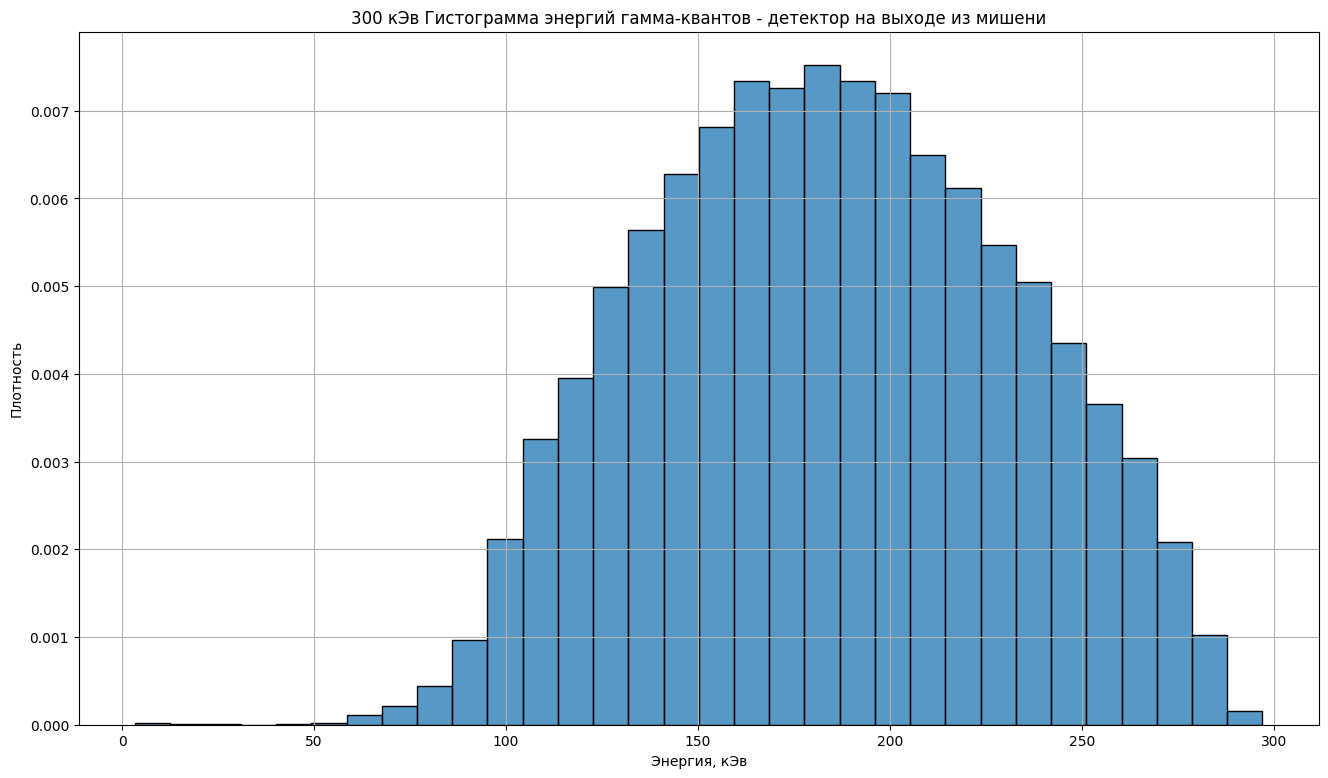

In [134]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.histplot(data = kev300, x = 'kinEn', bins = 32, stat = 'density')
ax.set_title("300 кЭв Гистограмма энергий гамма-квантов - детектор на выходе из мишени")
ax.set_xlabel('Энергия, кЭв')
ax.set_ylabel('Плотность')
plt.grid()
plt.show()

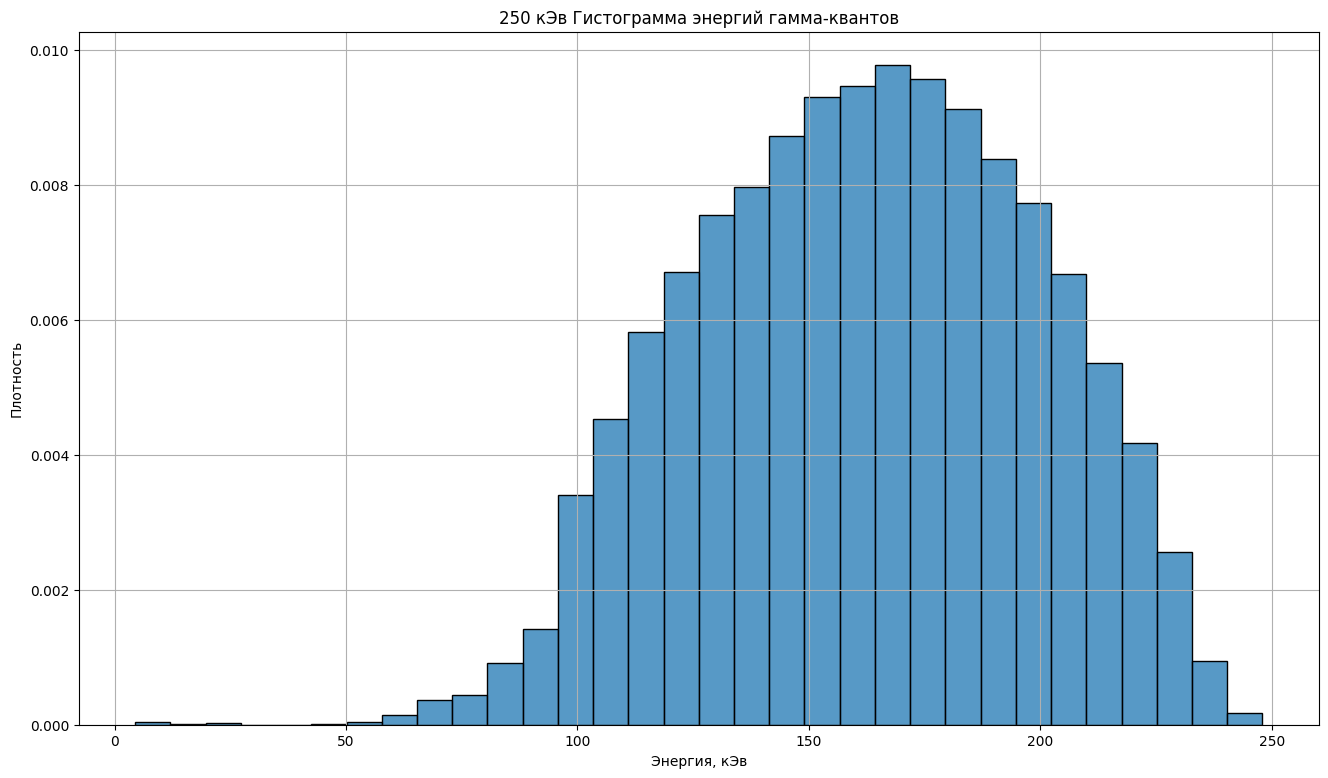

In [135]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.histplot(data = kev250, x = 'kinEn', bins = 32, stat = 'density')
ax.set_title("250 кЭв Гистограмма энергий гамма-квантов")
ax.set_xlabel('Энергия, кЭв')
ax.set_ylabel('Плотность')
plt.grid()
plt.show()

Построим относительную диаграмму направленности

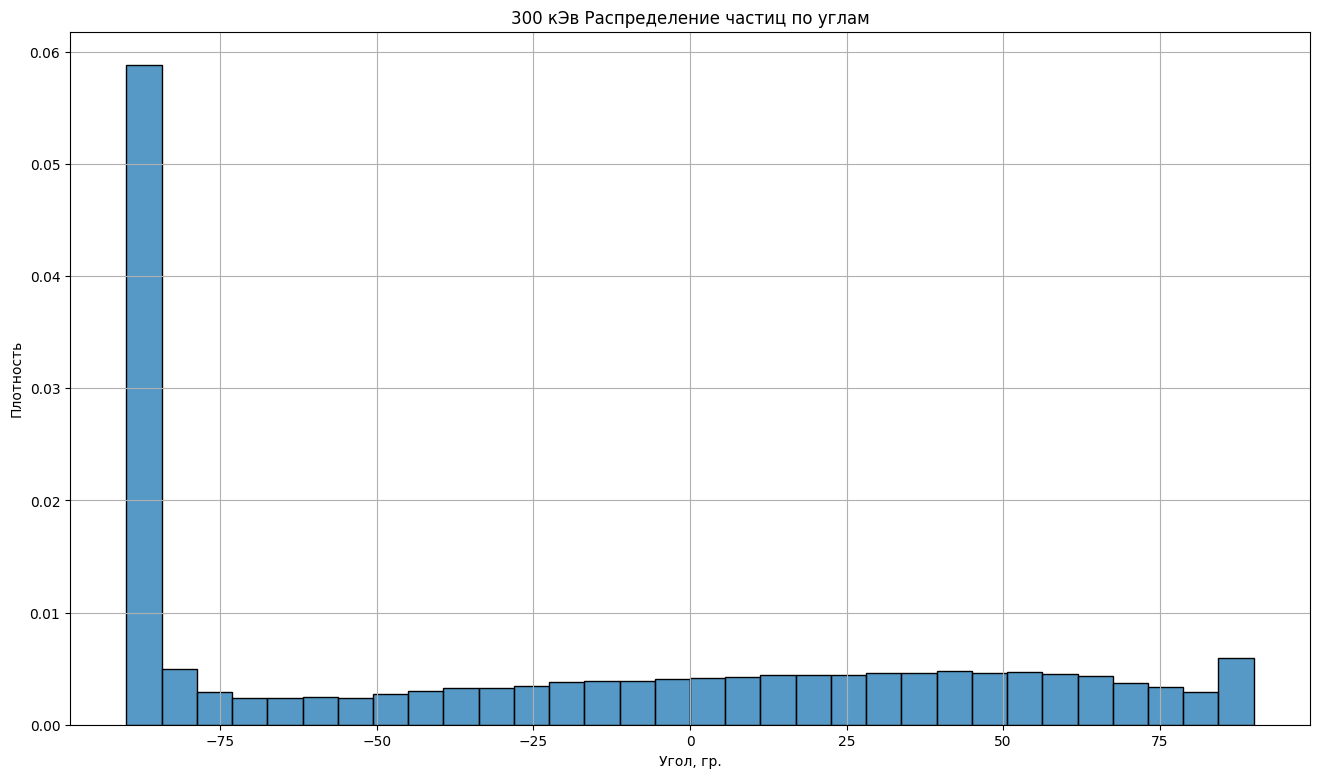

In [136]:
theta = np.arctan(kev300['y'] / kev300['z']) * 180 / np.pi
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
sns.histplot(x = theta, bins = 32, stat = 'density')
ax.set_title("300 кЭв Распределение частиц по углам")
ax.set_xlabel('Угол, гр.')
ax.set_ylabel('Плотность')
plt.grid()
plt.show()

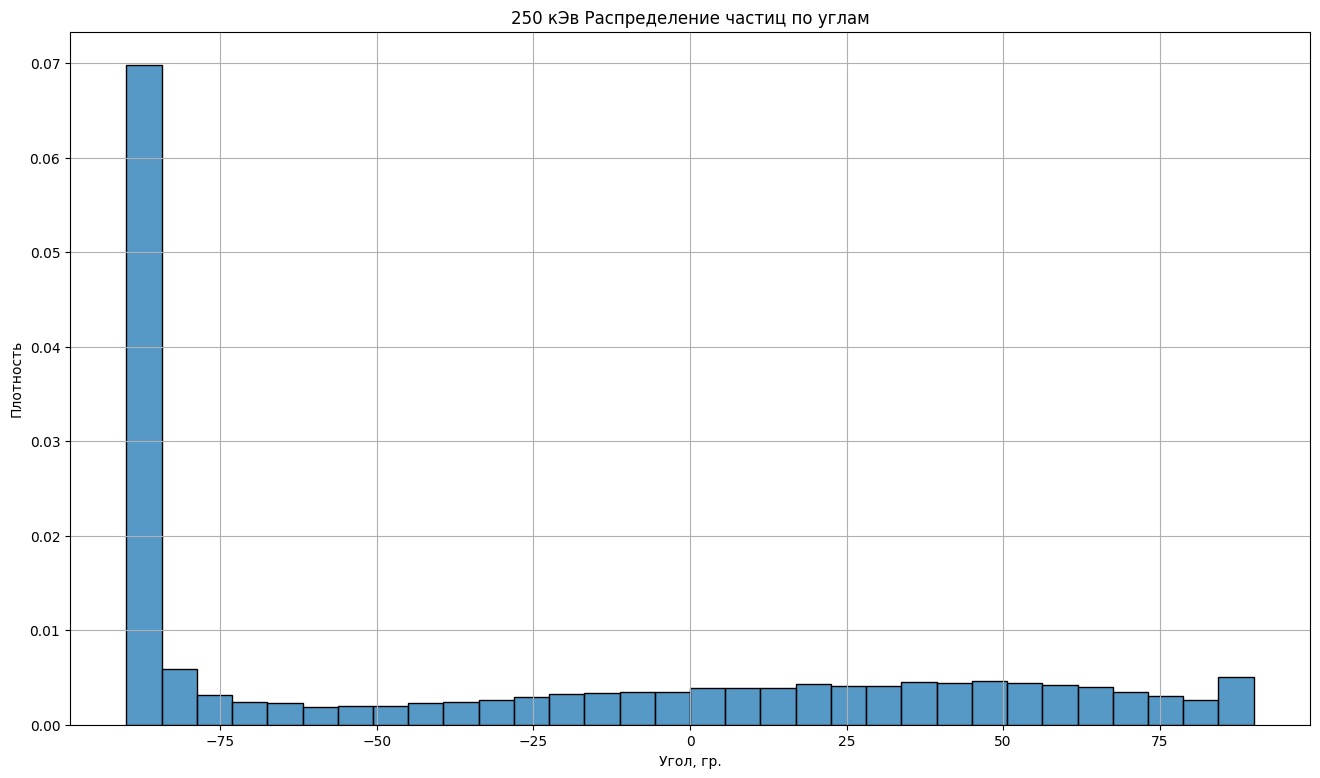

In [137]:
theta = np.arctan(kev250['y'] / kev250['z']) * 180 / np.pi
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot()
sns.histplot(x = theta, bins = 32, stat = 'density')
ax.set_title("250 кЭв Распределение частиц по углам")
ax.set_xlabel('Угол, гр.')
ax.set_ylabel('Плотность')
plt.grid()
plt.show()

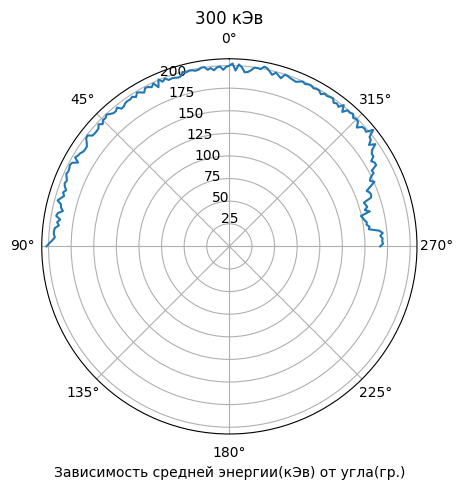

In [143]:
kev300_ang = kev300.copy()
kev300_ang['theta'] = np.round(np.arctan(kev300_ang['y'] / kev300_ang['z']) * 180 / np.pi, 0)
kev300_ang = kev300_ang.drop('x', axis=1)
kev300_ang = kev300_ang.drop('y', axis=1)
kev300_ang = kev300_ang.drop('z', axis=1)
kev300_ang = kev300_ang.drop('trackNum', axis=1)
kev300_ang = kev300_ang.drop('particleName', axis=1)
kev300_ang = kev300_ang.drop('IsFirstStepInVolume', axis=1)
kev300_ang = kev300_ang.groupby(by = 'theta').mean()
kev300_ang = kev300_ang.reset_index()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='polar')
ax.plot(kev300_ang['theta'] * np.pi / 180, kev300_ang['kinEn'])
ax.set_xlabel('Зависимость средней энергии(кЭв) от угла(гр.)')
ax.set_title("300 кЭв")
ax.set_theta_zero_location('W', offset=-90)
plt.tight_layout()
plt.show()

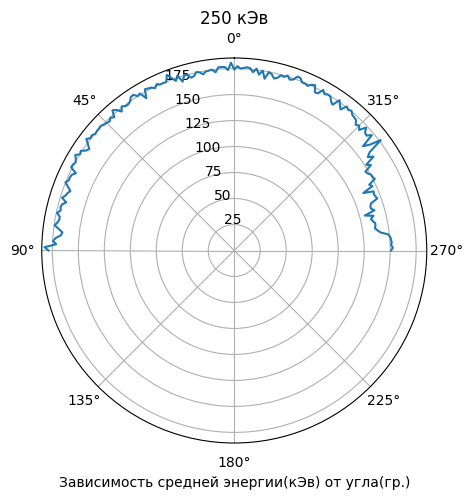

In [144]:
kev250_ang = kev250.copy()
kev250_ang['theta'] = np.round(np.arctan(kev250_ang['y'] / kev250_ang['z']) * 180 / np.pi,  0)
kev250_ang = kev250_ang.drop('x', axis=1)
kev250_ang = kev250_ang.drop('y', axis=1)
kev250_ang = kev250_ang.drop('z', axis=1)
kev250_ang = kev250_ang.drop('trackNum', axis=1)
kev250_ang = kev250_ang.drop('particleName', axis=1)
kev250_ang = kev250_ang.drop('IsFirstStepInVolume', axis=1)
kev250_ang = kev250_ang.groupby(by = 'theta').mean()
kev250_ang = kev250_ang.reset_index()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='polar')
ax.plot(kev250_ang['theta'] * np.pi / 180, kev250_ang['kinEn'])
ax.set_xlabel('Зависимость средней энергии(кЭв) от угла(гр.)')
ax.set_title("250 кЭв")
ax.set_theta_zero_location('W', offset=-90)
plt.show()

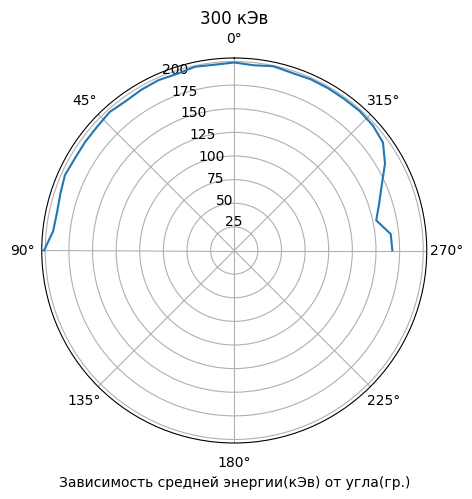

In [145]:
kev300_ang = kev300.copy()
kev300_ang['theta'] = np.round(np.arctan(kev300_ang['y'] / kev300_ang['z']) * 180 / np.pi / 6) * 6
kev300_ang = kev300_ang.drop('x', axis=1)
kev300_ang = kev300_ang.drop('y', axis=1)
kev300_ang = kev300_ang.drop('z', axis=1)
kev300_ang = kev300_ang.drop('trackNum', axis=1)
kev300_ang = kev300_ang.drop('particleName', axis=1)
kev300_ang = kev300_ang.drop('IsFirstStepInVolume', axis=1)
kev300_ang = kev300_ang.groupby(by = 'theta').mean()
kev300_ang = kev300_ang.reset_index()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='polar')
ax.plot(kev300_ang['theta'] * np.pi / 180, kev300_ang['kinEn'])
ax.set_xlabel('Зависимость средней энергии(кЭв) от угла(гр.)')
ax.set_title("300 кЭв")
ax.set_theta_zero_location('W', offset=-90)
plt.show()

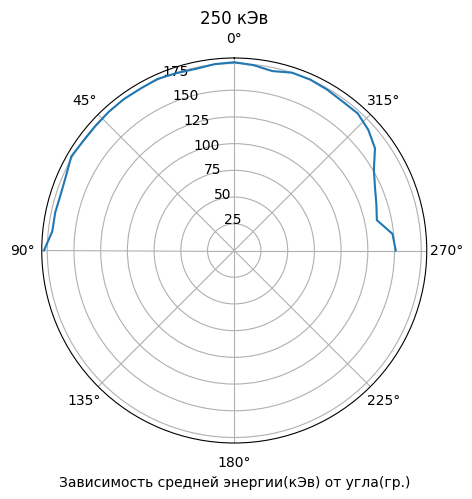

In [146]:
kev250_ang = kev250.copy()
kev250_ang['theta'] = np.round(np.arctan(kev250_ang['y'] / kev250_ang['z']) * 180 / np.pi / 6) * 6
kev250_ang = kev250_ang.drop('x', axis=1)
kev250_ang = kev250_ang.drop('y', axis=1)
kev250_ang = kev250_ang.drop('z', axis=1)
kev250_ang = kev250_ang.drop('trackNum', axis=1)
kev250_ang = kev250_ang.drop('particleName', axis=1)
kev250_ang = kev250_ang.drop('IsFirstStepInVolume', axis=1)
kev250_ang = kev250_ang.groupby(by = 'theta').mean()
kev250_ang = kev250_ang.reset_index()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='polar')
ax.plot(kev250_ang['theta'] * np.pi / 180, kev250_ang['kinEn'])
ax.set_xlabel('Зависимость средней энергии(кЭв) от угла(гр.)')
ax.set_title("250 кЭв")
ax.set_theta_zero_location('W', offset=-90)
plt.show()